[Dataset](https://github.com/JeffSackmann/tennis_atp)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Directory and version specifications

Se definiarán variables globales como los directorios desde donde se leen los datos, directorios donde se guardan los resultados y el timestamp para guardar los archivos generados de cada ejecución indiviudal.

In [3]:
from datetime import datetime

MODEL_TIMESTAMP = datetime.now().strftime("%Y-%m-%d__%H-%M-%S")

DATA_PATH = 'data/'

CLASSIFICATION_REPORTS_PATH = 'classification_reports/'
CONFUSION_MATRIX_PATH = 'confusion_matrix/'
TREE_PATH = 'tree/'

# Resolución de imágenes
resolution = 300

# Download and Store Data

Se crea un método para descargar todos los datos de partidos pertenecientes al siguiente repositorio de [Github JeffSackmann/tennis_atp](https://github.com/JeffSackmann/tennis_atp) y posterior guardado de los csv.

In [4]:
# for index in range(0,22):
#     index_str = str(index)

#     print(index_str)
    
#     if len(index_str) == 1:
#         index_str = '0' + index_str

#     print(index_str)

#     url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_20{}.csv".format(index_str)
#     print(url)

#     FILE_NAME = "atp_matches_20{}.csv".format(index_str)

#     df = pd.read_csv(url, index_col=0, parse_dates=[0])
#     df.to_csv(DATA_PATH + FILE_NAME)

# # data_frame = pd.read_csv(DATA_PATH + FILE_NAME)

# Load Data

Métod para cargar todos los datos de los partidos (desde el año 2000 hasta el 2022) en un único csv `atp`.

In [5]:
atp = pd.DataFrame()

years_index_20_22 = range(0,22)

for index in years_index_20_22:
    index_str = str(index)

    if len(index_str) == 1:
        index_str = '0' + index_str

    FILE_NAME = "atp_matches_20{}.csv".format(index_str)

    data_frame_iter = pd.read_csv(DATA_PATH + FILE_NAME)
    atp = pd.concat([atp, data_frame_iter])

pd.set_option('display.max_columns', None)
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,20210917,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,20210918,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


El objetivo de la sección de clasificación es averiguar el tipo de pista en la que se ha jugado el partido en función de una serie de variables, esto puede cobrar sentido ya que dependiendo de la superficie de la pista la velocidad con la que rebota la pelota es distinta, y por lo tanto puede influir en las variables del juego.

A continuación analizaremos los campos de importancia que se utilizarán en este proyecto de cara a los experimentos:


- `surface`: tipo de superficie de la pista en la que se ha jugado el partido, exiten cuatro tipos de pista:
    - Clay: Tierra batida.
    - Hard: Pista dura.
    - Carpet: Moqueta.
    - Grass: Césped.
- `minutes`: número de minutos transcurridos en el partido.
- `winner_ht, loser_ht`: altura del jugador ganador y del perdedor respectivamente.
- `w_ace, l_ace`: número de aces (saques directos) del ganador y del perdedor respectivamente.
- `w_svpt, l_svpt`: número de saques (service points) del ganador y del perdedor respectivamente.
- `w_1stWon, l_1stWon`: número de puntos ganados con primer saque (1st service) del ganador y del perdedor respectivamente.
- `w_2ndWon, l_2ndWon`: número de puntos ganados con segundo saque (2nd service) del ganador y del perdedor respectivamente.
- `w_bpSaved, l_bpSaved`: número puntos de rotura de servicio (break points) que ha neutralizado el ganador y el perdedor respectivamente.
- `w_bpFaced, l_bpFaced`: número puntos de rotura de servicio (break points) que han surfido el ganador y el perdedor respectivamente.
- `w_SvGms, l_SvGms`: número de juegos ganados con servicio propio del ganador y perdedor respectivamente.
- `winner_rank_points, loser_rank_points`: número de puntos en el ranking de la ATP del ganador y el perdedor.
- `round`: ronda en la que se ha jugado el partido dentro del torneo.



# Clean Dataset

Comenzaremos con la limpieza del dataset, donde obtendremos los campos mencionados en el apartado anterior:

In [6]:
COLUMNS_TO_GET = [
                  "surface",
                  "minutes",
                  "winner_ht", "loser_ht",
                  "w_ace", "l_ace",
                  "w_svpt", "l_svpt", # service points
                  "w_1stWon", "l_1stWon",
                  "w_2ndWon", "l_2ndWon",
                  "w_bpSaved", "l_bpSaved",
                  "w_bpFaced", "l_bpFaced",
                  "w_SvGms", "l_SvGms", # service games won
                  "winner_rank_points", "loser_rank_points",
                  "round",
                 ]

In [7]:
atp = atp.loc[:, atp.columns.isin(COLUMNS_TO_GET)]

atp = atp[atp['round'] != 'RR']
atp = atp[atp['round'] != 'ER']

atp = atp.dropna()

A continuación trataremos el campo `round` y lo transformaermos a numérico para que el árbol de decisión pueda tomar elecciones en función de la ronda del torneo a la que pertenece cada partido.

In [8]:
round_replace = {'R128': 128,
                  'R64': 64,
                  'R32': 32,
                  'R16': 16,
                  'QF': 4,
                  'SF': 2,
                  'F': 1
}

# Eliminamos las Round Robin (RR y ER)
atp['round'].replace(round_replace, inplace = True)

# Sesgos

En el dataset podemos observar que existe un sesgo en función del tipo de pista. Gran parte de los partidos se juegan en pista dura, que es menos costosa de mantener que las pistas de hierba y de moqueta. Este desbalanceo de datos afectaría notablemente a las predicciones del modelo ya que aprendería más de aquellas muestras más numerosas en el conjunto de datos que del resto de ellas. Por lo tanto tendría una tendencia a predecir la superficie de la pista como dura, reduciendo la efectividad de las clases menos numerosas en el dataset.

Por este motivo se realizará un downsampling a los datos, igualando el número de muestras a la clase menos numerosa en el conjunto de datos.

In [9]:
atp.surface.value_counts()

Hard      29064
Clay      17432
Grass      5844
Carpet     1402
Name: surface, dtype: int64

In [10]:
from sklearn.utils import resample

hard_data = atp[atp['surface'] == 'Hard']
clay_data = atp[atp['surface'] == 'Clay']
grass_data  = atp[atp['surface'] == 'Grass']
carpet_data = atp[atp['surface'] == 'Carpet']

X_hard_downsampled = resample(hard_data,
                                replace = True,
                                n_samples = len(carpet_data))

X_clay_downsampled = resample(clay_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

X_grass_downsampled = resample(grass_data,
                                 replace = True,
                                 n_samples = len(carpet_data))

atp = pd.concat([X_hard_downsampled, X_clay_downsampled, X_grass_downsampled, carpet_data])

Una vez realizado el downsampling podemos comprobar que el número de muestras de cada clase es la misma, por lo tanto podemos comenzar a entrenar los modelos evitando el problema de desbalanceo.

In [11]:
atp.surface.value_counts()

Hard      1402
Clay      1402
Grass     1402
Carpet    1402
Name: surface, dtype: int64

In [12]:
labels = atp["surface"]
atp = atp.drop(columns=["surface"])

# Decision Tree with CV

A continuación definiremos un método para encontrar la profundidad óptima del árbol de decisión (con rangos de profundidad desde 2 hasta 20) utilizando la técnica de validación cruzada, comparando en cada iteración (en función del rango de profundidades) el mejor modelo del histórico con respecto al modelo actual que se ha entrenado.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10
# 3,5,7 -> 6
cv = KFold(n_splits = splits, random_state = 3, shuffle = True)

depths = range (2,20)
best_accuracy = 0

for depth in depths:
    mean_score = 0.0

    for train_index, test_index in cv.split(atp):

        x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
        x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

        model = DecisionTreeClassifier(max_depth = depth, random_state = 2)
        model.fit(x_train, y_train)

        accuracy = model.score(x_test,y_test)

        mean_score = mean_score + accuracy
        
    mean_score = mean_score/splits
    print(f"Depth: {depth}, mean score: {mean_score}")

    if (mean_score > best_accuracy):
        best_accuracy = mean_score
        best_model = model
    
    print(f"Best mean score: {best_accuracy}, best depth: {best_model.get_depth()}")

print("Done!")

Depth: 2, mean score: 0.3865972752737459
Best mean score: 0.3865972752737459, best depth: 2
Depth: 3, mean score: 0.41779539088362616
Best mean score: 0.41779539088362616, best depth: 3
Depth: 4, mean score: 0.4238591800356506
Best mean score: 0.4238591800356506, best depth: 4
Depth: 5, mean score: 0.42778202189966896
Best mean score: 0.42778202189966896, best depth: 5
Depth: 6, mean score: 0.43758626177743826
Best mean score: 0.43758626177743826, best depth: 6
Depth: 7, mean score: 0.42885345047109746
Best mean score: 0.43758626177743826, best depth: 6
Depth: 8, mean score: 0.42510822510822505
Best mean score: 0.43758626177743826, best depth: 6
Depth: 9, mean score: 0.4192175961293608
Best mean score: 0.43758626177743826, best depth: 6
Depth: 10, mean score: 0.41743570155334864
Best mean score: 0.43758626177743826, best depth: 6
Depth: 11, mean score: 0.41779125286478236
Best mean score: 0.43758626177743826, best depth: 6
Depth: 12, mean score: 0.41154921059332833
Best mean score: 0.4

Gracias al `random_seed` especificado en el `cross-validation` podemos fijar que el resultado del experimento mantenga que el mejor árbol tenga como profundidad 6 niveles. Esto nos permite mantener los resultados en distintas ejecuciones y poder detallarlos.

Podemos observar que el error medio para el árbol de profundidad 6 es del orden de 0.42 aproximadamente (accuracy), es decir, que del 100% total de muestras en el dataset ha clasificado correctamente un 42% aproximadamente entre todas las clases del modelo.

En posteriores apartados analizaremos el resto de métricas, como el `recall` o el `f1-score`, que nos darán mayor información de cómo se está comportando el modelo.

## Tree Plot

A continuación mostraremos el desglose del mejor árbol de decisión obtenido, como hemos visto en la sección anterior, el árbol con mejor precisión (`score`) es aquel que contiene 6 niveles de profundidad.

In [ ]:
plt.figure(figsize=(25,12))
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"best_depth_{best_model.get_depth()}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

El primer nodo padre del árbol divide los resultados en función del número de puntos ganados con saque directo del jugador que acabó ganando el partido, es decir, es el campo que mejor divide las observaciones en función del tipo de pista. Esto cobra sentido ya que los saques rebotan con más velocidad en pistas más rápidas (pista dura y hierba), por lo que son más difíciles de restar, y más fáciles de responder en pistas más lentas (tierra batida).

La métrica Gini muestra la probabilidad que tienen las muestras que llegan a ese nodo de ser clasificadas incorrectamente cuando se les asigna una clase aleatoria.

El número de muestras que llegan al primer nodo es el total de todos los ejemplos en el dataset, es decir, 5048 muestras.

Este proceso se repite para cada uno de los nodos del árbol de decisión hasta llegar al último nivel, que es el que dictará a qué clase pertenece la muestra que haya recorrido el camino del árbol hasta llegar a la hoja correspondiente.


## Confusion Matrix

En esta sección analizaremos los resultados de la clasificación del árbol de clasificación obtenido en el apartado anterior, obteniendo la matriz de confusión de los resultados sobre el conjunto de test.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

FILE_NAME = f"best_depth_{best_model.get_depth()}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

Observamos los resultados de la clasificación del conjunto de test, en el eje de ordenadas se proyectan las clases verdaderas a las que pertenecen las muestras, mientras que en el eje de abcisas se muestra la clasificación del árbol de decisión entrenado.

## Classification Report

En esta sección se mostrarán las métricas correspondientes a la clasificación de los datos del conjunto de test por parte del árbol de decisión.

In [ ]:
from sklearn.metrics import classification_report

FILE_NAME = f"best_depth_{best_model.get_depth()}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)

display(report_df.style.highlight_max(subset = ['precision', 'recall'], color='green')\
                       .highlight_min(subset = ['precision', 'recall'], color='red'))

La `precision` representa el porcentaje real de acierto en la clasificación de muestras como verdaderas para cada una de las clases, mientras que el `recall` indica el porcentaje total identificado de las muestras de cada clase.

Observamos que la menor precisión y el menor recall se manifiestan en la clasificación de pistas duras, mientras que obtenemos los máximos valores en pistas de tierra batida.

Podemos concluir que con los datos disponibles, entrenando este clasificador no se han conseguido unos resultados muy prometedores respecto a los objetivos iniciales del proyecto.

In [51]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predictions_prob = best_model.predict_proba(x_test)

# roc_auc_score(y_test, predictions_prob)

fpr, tpr, _ = roc_curve(y_test, predictions_prob[:,1])

plt.clf()
plot.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ValueError: multiclass format is not supported

# Decision Tree with GridSearch

Buscar los mejores parámetros mediante el método `GridSearch`, que buscará modificar los hiperparametros del árbol de clasificación con el objetivo de mejorar la precisión de los resultados.

Debido a motivos de rendimiento, se limitará considerablemente el espacio de búsqueda de hiperparámetros.

Para la construcción del método `GridSearch` se utilizará un Pipeline que se compondrá de:
- `PCA`: Análisis de componentes principales que obtendrá los parámetros correspondientes con respecto a la iteración de `GridSearch`
- `DecisionTreeClassifier`: Árbol que se entrenará con los parámetros correspondientes a la iteración de `GridSearch`

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = atp
y = labels

pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier(random_state = 2)

pipe = Pipeline(steps=[('pca', pca),
                       ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1]+1, 1))

criterion = ['gini', 'entropy']

depths = list(range(3,12))
min_impurity_decrease = [x/10000 for x in range(1, 900, 20)]
min_samples_split = list(range(15, 35))


parameters = dict(pca__n_components = n_components,
                  dec_tree__criterion = criterion,
                  dec_tree__max_depth = depths,
                  dec_tree__min_impurity_decrease = min_impurity_decrease,
                  dec_tree__min_samples_split = min_samples_split)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

best_criterion = clf_GS.best_estimator_.get_params()['dec_tree__criterion']
best_max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth'] 
best_max_min_impurity_decrease = clf_GS.best_estimator_.get_params()['dec_tree__min_impurity_decrease'] 
best_min_samples_split = clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'] 

print('Best Criterion:', best_criterion)
print('Best Max Depth:', best_max_depth)
print('Best Max Min impurity decrease:', best_max_min_impurity_decrease)
print('Best Min Samples Split:', best_min_samples_split)
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Observamos que los parámetros que mejor se ajustan al modelo con nuestro conjunto de datos son `criterion='entropy', max_depth=7`.

Una vez hemos obtenido los parámetros que mejor minimizan el error de clasificación del árbol, entrenaremos el árbol con dichos parámetros mediante el método de validación cruzada.

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn import tree

splits = 10

cv = KFold(n_splits = splits, shuffle = True)

best_accuracy = 0

mean_score = 0.0
for train_index, test_index in cv.split(atp):

    x_train, y_train = atp.iloc[train_index], labels.iloc[train_index]
    x_test, y_test   = atp.iloc[test_index],  labels.iloc[test_index]

    model = DecisionTreeClassifier(criterion = best_criterion,
                                   max_depth = best_max_depth,
                                   random_state = 2)
    model.fit(x_train, y_train)

    accuracy = model.score(x_test,y_test)

    mean_score = mean_score + accuracy


mean_score = mean_score/splits

print("Mean: ", mean_score)
print("Done!")

Mean:  0.41904698242933536
Done!


## Tree plot

Mostraremos el árbol entrenado resultante con los parámetros escogidos por el método `GridSearch`.

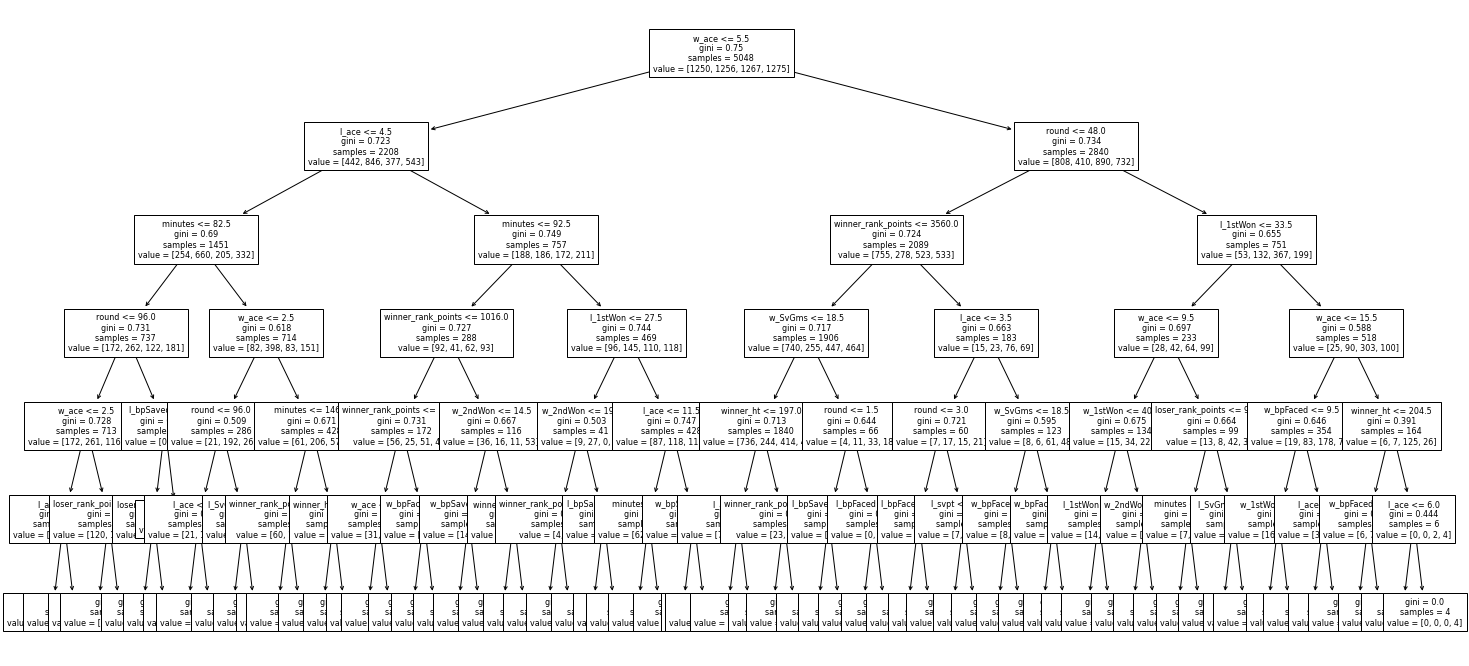

In [78]:
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree_plot = tree.plot_tree(best_model, fontsize=8, feature_names = atp.columns)

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_tree_{MODEL_TIMESTAMP}"

plt.savefig(TREE_PATH + FILE_NAME, dpi = resolution)

Observamos que los primeros niveles son 

## Confusion Matrix

En esta sección analizaremos los resultados y las métricas obtenidas por el método `GridSearch`

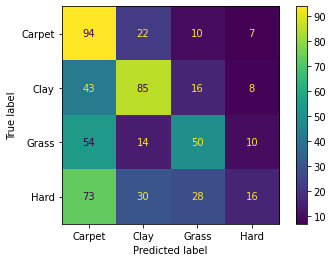

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

# Save Confusion Matrix image
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cm_{MODEL_TIMESTAMP}"

confusion_matrix = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)
confusion_matrix.figure_.savefig(CONFUSION_MATRIX_PATH + FILE_NAME, dpi = resolution)

Como en el caso de la matriz de confusión anterior, en el eje de las x tenemos los valores predecidos y en el eje de las y los valores verdaderos. Observamos que los resultados son ligeramente XX

## Classification Report

In [80]:
from sklearn.metrics import classification_report

# Save Classification Report csv
FILE_NAME = f"gs_{best_criterion}_{best_max_depth}_cr_{MODEL_TIMESTAMP}.csv"

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df.to_csv(CLASSIFICATION_REPORTS_PATH + FILE_NAME, index= True)

display(report_df.style.highlight_max(subset = ['precision', 'recall'], color='green')\
                       .highlight_min(subset = ['precision', 'recall'], color='red'))

,precision,recall,f1-score,support
Carpet,0.392694,0.646617,0.488636,133.000000
Clay,0.477987,0.500000,0.488746,152.000000
Grass,0.457944,0.382812,0.417021,128.000000
Hard,0.386667,0.197279,0.261261,147.000000
accuracy,0.428571,0.428571,0.428571,0.428571
macro avg,0.428823,0.431677,0.413916,560.000000
weighted avg,0.429177,0.428571,0.412611,560.000000


Observamos que la menor `precisión` y el menor `recall` se manifiestan en la clasificación de pistas duras, mientras que obtenemos los máximos valores en pistas de tierra batida.

Podemos concluir que con los datos disponibles, entrenando este clasificador no se han conseguido unos resultados muy prometedores respecto a los objetivos iniciales del proyecto.